In [1]:
import sys
sys.path.insert(0, 'src') 
sys.path.insert(0, '/data/ch52669/gene_interaction/tot-gene-sets/MedAgents') 
import os
import json
from functools import partial

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import argparse
from tot.methods.bfs import solve
from tot.tasks.bio_name import Bio_Name

In [4]:
import argparse

medagents_config = {'model_name':'gpt-3.5-turbo-1106', \
                    'method':'syn_verif', \
                    'max_attempt_vote':3,\
                    'ans_num':2,\
                    'numerical':True
                   }

tot_config = {'backend':'gpt-3.5-turbo-1106', 'temperature':0.7, 'task':'bio_name', 'naive_run':False, \
              'prompt_sample':None, 'method_generate':'sample_bionames', \
              'method_evaluate':'medagents_w_tools', 'method_select':'greedy', \
              'n_generate_sample':3, 'n_evaluate_sample':2, 'n_select_sample':2, \
              'source':'GO:BP', 'bio_type':"Biological Process",'filter_method':'sim', \
              'filter_size':5, 'voting_setting':None}

args_config = {**medagents_config, **tot_config}


args = argparse.Namespace(**args_config)
print('args', args)
task = Bio_Name()

args Namespace(model_name='gpt-3.5-turbo-1106', method='syn_verif', max_attempt_vote=3, ans_num=2, numerical=True, backend='gpt-3.5-turbo-1106', temperature=0.7, task='bio_name', naive_run=False, prompt_sample=None, method_generate='sample_bionames', method_evaluate='medagents_w_tools', method_select='greedy', n_generate_sample=3, n_evaluate_sample=2, n_select_sample=2, source='GO:BP', bio_type='Biological Process', filter_method='sim', filter_size=5, voting_setting=None)


In [5]:
def test_example(args, task, idx):
    label = task.get_label(idx)
    final_answer, ys, steps, trie = solve(args, task, idx)
    return final_answer, ys, steps, label, trie

In [6]:
final_answer, ys, steps, label, trie = test_example(args, task, 1)

use_tool


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


question_classifier You are a medical expert who specializes in categorizing a specific medical scenario into specific areas of medicine.
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  0.6147990226745605
raw_question_domain Medical Field: Genetics | Molecular Biology | Developmental Biology | Oncology | Orthopedics
question_domains ['Genetics', 'Molecular Biology', 'Developmental Biology', 'Oncology', 'Orthopedics']
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  0.7540700435638428
options_domains ['Genetics', 'Developmental Biology']
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  9.8324134349823
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  8.345906257629395
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  5.845562219619751
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  6.692108631134033
Generating response for engine:  gpt-3.5-turbo

Finish!
Time taken:  7.574367523193359
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  7.9257893562316895
q_analyses_text Report0 
Question: Here is the set of genes: SHH BMP5 FGF10 SULF1 EGFR NODAL TP63 FGFR2 SOSTDC1 CTNNB1 AR WNT2B LUZP1 HOXD13 CECR2 NOG GDF7 RDH10 WNT2 OVOL2 HIF1A BMP7 BMP4 WNT5A
. What are the two most prominent biological processes performed by the system?. 
Domain: Genetics 
Analysis: The question seems to be asking about the biological processes associated with the set of genes listed. As a genetics expert, I understand that these genes are involved in various biological processes and pathways related to development, cell signaling, and tissue homeostasis. The genes listed include those involved in embryonic development (SHH, BMP4, BMP5, FGF10, NODAL, HOXD13), cell proliferation and differentiation (EGFR, TP63, FGFR2, CTNNB1), bone development and maintenance (SOSTDC1, WNT2B, BMP7, WNT5A), and other processes such as metabolism (HIF1A, R

Finish!
Time taken:  6.0997748374938965
syn_report Question: Here is the set of genes: SHH BMP5 FGF10 SULF1 EGFR NODAL TP63 FGFR2 SOSTDC1 CTNNB1 AR WNT2B LUZP1 HOXD13 CECR2 NOG GDF7 RDH10 WNT2 OVOL2 HIF1A BMP7 BMP4 WNT5A
. What are the two most prominent biological processes performed by the system?. 
Options: {'A': 'Embryonic Development', 'B': 'Cell Signaling', 'C': 'Skeletal Development'} 
Total Analysis: Based on the comprehensive analysis provided by genetics, molecular biology, developmental biology, oncology, orthopedics, and gene ontology experts, it is evident that the set of genes listed is associated with a wide range of biological processes. However, the most prominent processes are consistently identified as embryonic development and cell signaling. These processes are crucial for regulating the development of various tissues and organs during embryogenesis, as well as mediating cell-to-cell communication and signaling pathways essential for normal physiological functions.

use_tool
question_classifier You are a medical expert who specializes in categorizing a specific medical scenario into specific areas of medicine.
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  1.3787264823913574
raw_question_domain Based on the medical scenario provided, the two most prominent biological processes performed by the system are likely related to embryonic development and cell signaling.

Classification:
Medical Field: Genetics | Developmental Biology | Molecular Biology | Oncology | Orthopedics
question_domains ['Genetics', 'Developmental Biology', 'Molecular Biology', 'Oncology', 'Orthopedics']
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  1.3147900104522705
options_domains ['This field is essential for comprehending the']
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  6.519205331802368
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  6.400485992431641
Generating respo

Finish!
Time taken:  7.891613483428955
q_analyses_text Report0 
Question: Here is the set of genes: SHH BMP5 FGF10 SULF1 EGFR NODAL TP63 FGFR2 SOSTDC1 CTNNB1 AR WNT2B LUZP1 HOXD13 CECR2 NOG GDF7 RDH10 WNT2 OVOL2 HIF1A BMP7 BMP4 WNT5A
. What are the two most prominent biological processes performed by the system?. 
Domain: Genetics 
Analysis: The question seems to be asking about the biological processes associated with the set of genes listed. The genes mentioned in the question are associated with various biological processes, and the question is asking for the two most prominent processes performed by this system of genes.

As a genetics expert, I can identify that the listed genes are involved in several biological processes, including embryonic development, cell signaling, tissue growth and differentiation, and regulation of gene expression. However, it's important to note that the prominence of a biological process can vary depending on the context and the specific genetic interac

Finish!
Time taken:  6.251971960067749
syn_report Question: Here is the set of genes: SHH BMP5 FGF10 SULF1 EGFR NODAL TP63 FGFR2 SOSTDC1 CTNNB1 AR WNT2B LUZP1 HOXD13 CECR2 NOG GDF7 RDH10 WNT2 OVOL2 HIF1A BMP7 BMP4 WNT5A
. What are the two most prominent biological processes performed by the system?. 
Options: {'A': 'Limb Development', 'B': 'Neural Tube Development', 'C': 'Ectoderm Formation', 'D': 'Hedgehog Signaling Pathway', 'E': 'Wnt Signaling Pathway', 'F': 'FGF Signaling Pathway'} 
Total Analysis: The set of genes provided is associated with multiple biological processes, including embryonic development, cell signaling, tissue patterning, and musculoskeletal development. The most prominent biological processes associated with this set of genes are likely to be embryonic development and cell signaling, as identified by genetics, developmental biology, molecular biology, and oncology experts. These processes are crucial for the formation and organization of tissues and organs during

use_tool
question_classifier You are a medical expert who specializes in categorizing a specific medical scenario into specific areas of medicine.
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  1.317406177520752
raw_question_domain Medical Field: Genetics | Molecular Biology | Developmental Biology | Oncology | Orthopedics
question_domains ['Genetics', 'Molecular Biology', 'Developmental Biology', 'Oncology', 'Orthopedics']
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  1.5944948196411133
options_domains ['Genetics and Molecular Biology']
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  7.332376480102539
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  6.244778871536255
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  6.639801502227783
Generating response for engine:  gpt-3.5-turbo-1106
Finish!
Time taken:  6.522968769073486
Generating response for engine:  gpt-3.

Finish!
Time taken:  7.8809638023376465
q_analyses_text Report0 
Question: Here is the set of genes: SHH BMP5 FGF10 SULF1 EGFR NODAL TP63 FGFR2 SOSTDC1 CTNNB1 AR WNT2B LUZP1 HOXD13 CECR2 NOG GDF7 RDH10 WNT2 OVOL2 HIF1A BMP7 BMP4 WNT5A
. What are the two most prominent biological processes performed by the system?. 
Domain: Genetics 
Analysis: The question seems to be asking about the biological processes associated with the set of genes listed. The genes mentioned in the question are associated with various biological processes, and the question is asking for the two most prominent processes performed by this system of genes.

As a genetics expert, I can identify that the genes listed are involved in several biological processes, including embryonic development, cell signaling, tissue growth and differentiation, and regulation of gene expression. Some of the specific processes associated with these genes include limb development (HOXD13), bone formation (BMP4, BMP5, BMP7), cell prolife

Finish!
Time taken:  9.531227350234985
syn_report Question: Here is the set of genes: SHH BMP5 FGF10 SULF1 EGFR NODAL TP63 FGFR2 SOSTDC1 CTNNB1 AR WNT2B LUZP1 HOXD13 CECR2 NOG GDF7 RDH10 WNT2 OVOL2 HIF1A BMP7 BMP4 WNT5A
. What are the two most prominent biological processes performed by the system?. 
Options: {'A': 'Digital Ray Development', 'B': 'Apical Ectodermal Ridge (AER) Formation', 'C': 'Skeletal Muscle Differentiation', 'D': 'Canonical Wnt Signaling Pathway', 'E': 'Non-Canonical Wnt Signaling Pathway', 'F': 'Planar Cell Polarity Pathway'} 
Total Analysis: ** 
Based on the analysis provided by experts from Genetics, Molecular Biology, Developmental Biology, Oncology, and Orthopedics, it is evident that the genes listed are associated with various biological processes such as embryonic development, cell signaling, tissue patterning, skeletal development, and bone formation. The most prominent biological processes performed by this system of genes are likely to be cell signaling, 

In [8]:
dot = trie.visualize()

In [ ]:
ids = [0,1,2]
values = [1,0,0]
sorted(ids, key=lambda x: values[x], reverse=True)[:1]

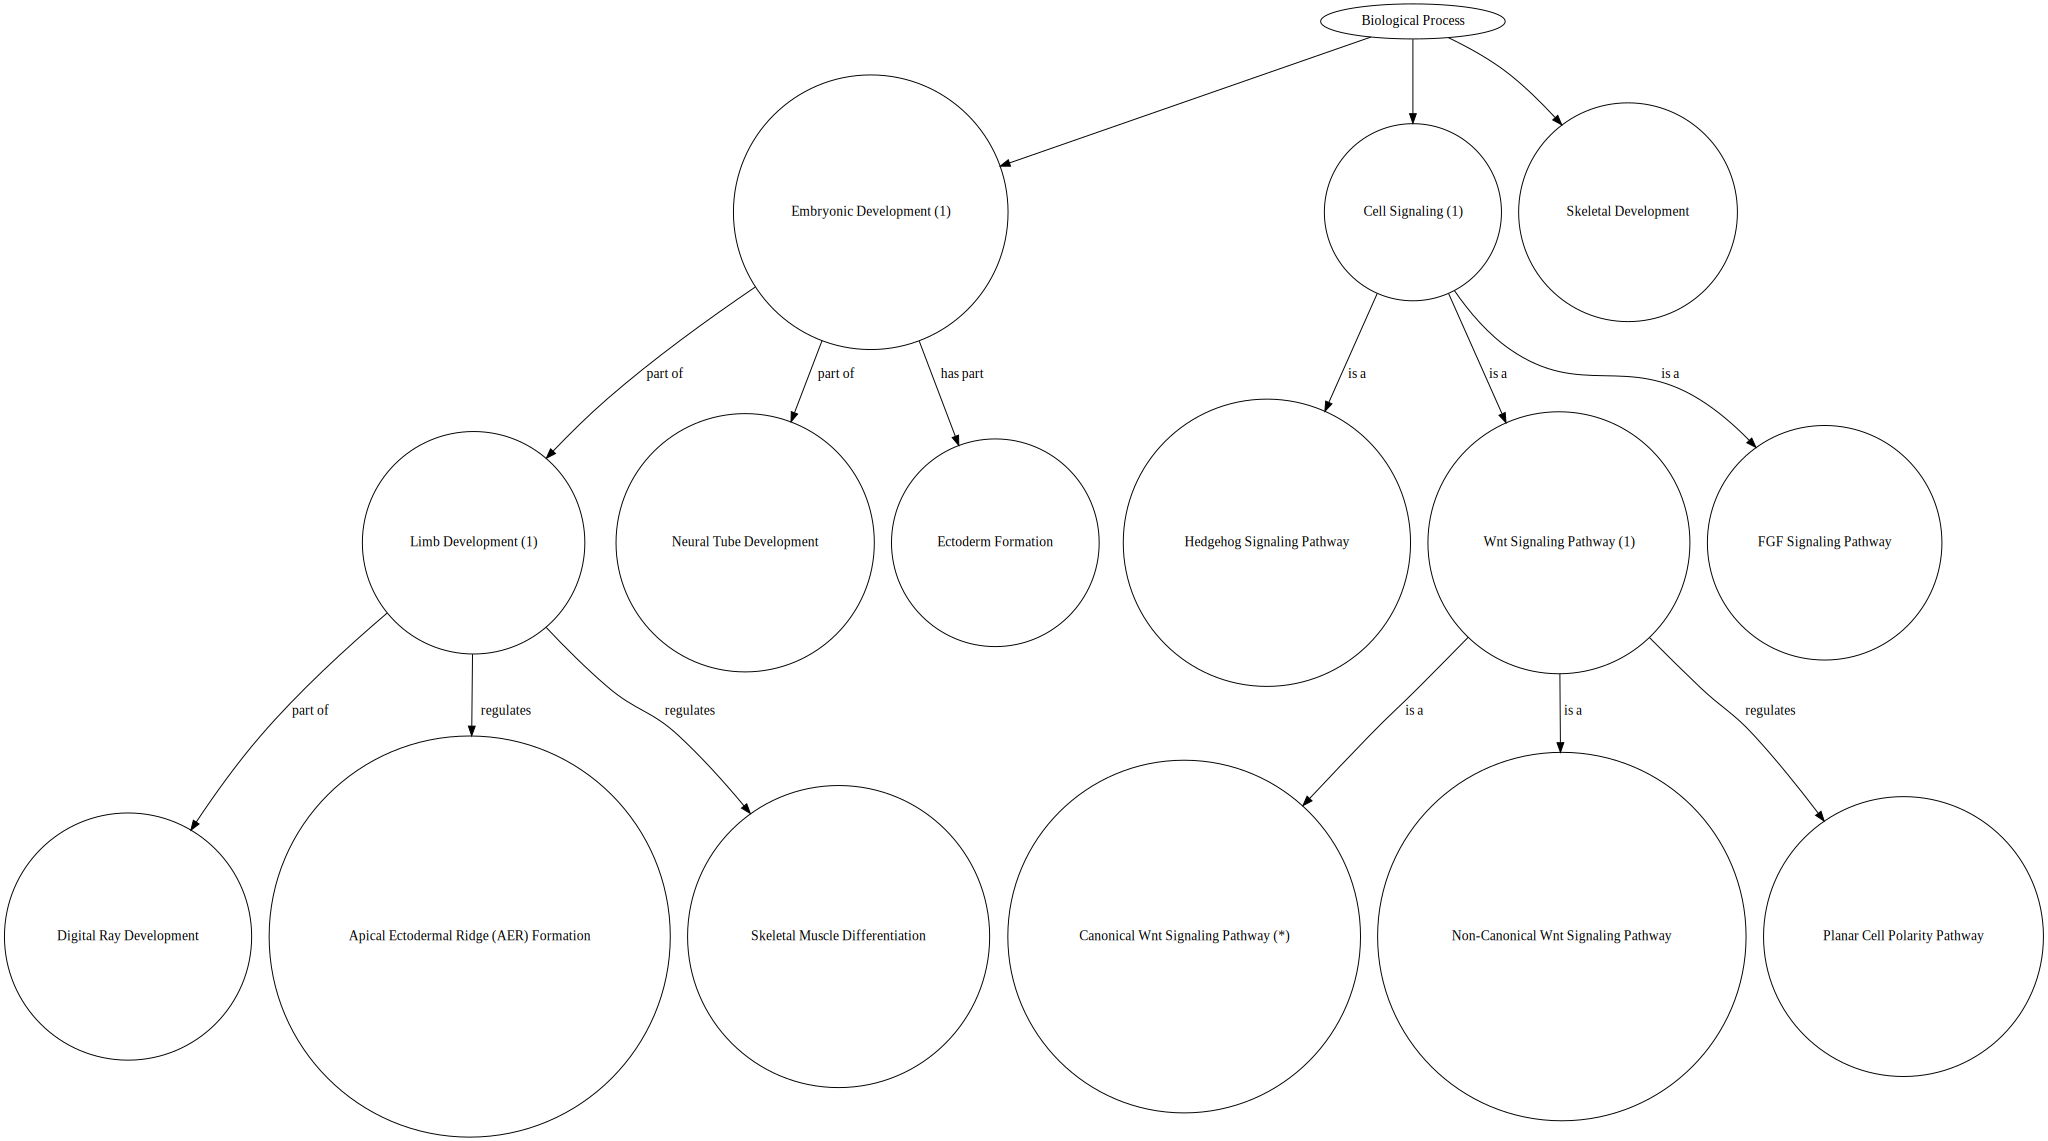

In [9]:
dot

In [10]:
final_answer

'Canonical Wnt Signaling Pathway'

In [11]:
label

'morphogenesis of an epithelial fold\n'